## Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

## ANSWER:


In [32]:
# Import import libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [33]:
#Step1: Read file
bank = pd.read_csv("bank.csv", sep=";")

In [34]:
# Let's Display Top five Rows
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [37]:
# Count of duplicated rows
bank[bank.duplicated()].shape

(0, 17)

In [38]:
# Count number of yes & no
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

C:\Users\91830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

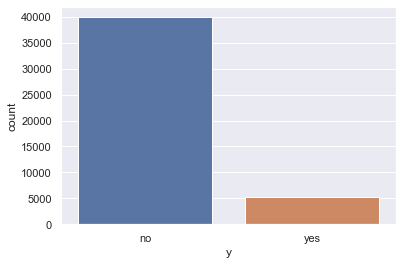

In [39]:
sns.countplot(bank['y'])

In [40]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [41]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [42]:
# Let's Delete unwanted columns
df= bank.drop(["job","marital","education","contact","day","month","poutcome"],axis=1)

In [43]:
df.head(2)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,261,1,-1,0,no
1,44,no,29,yes,no,151,1,-1,0,no


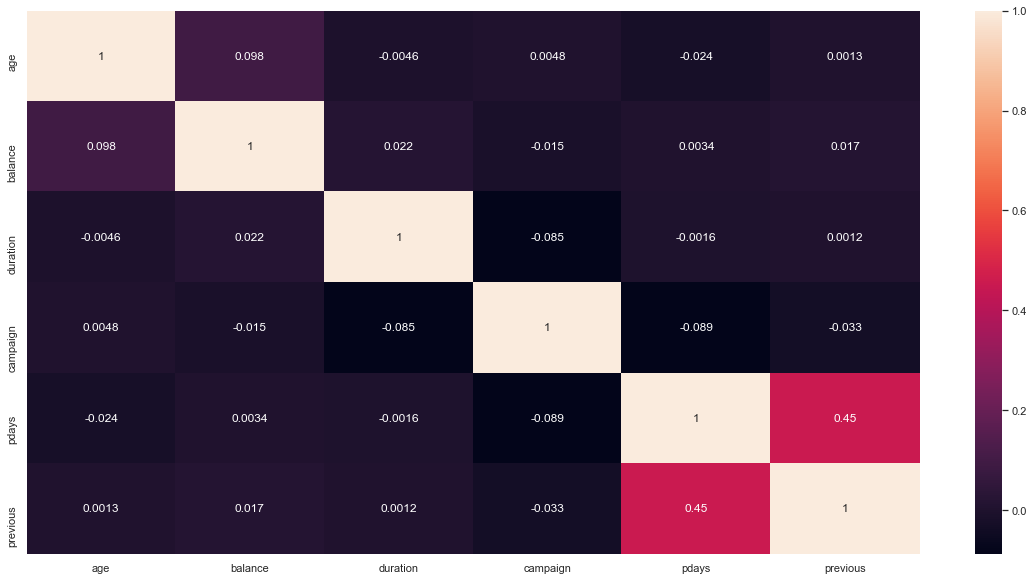

In [44]:
# let's display Heat-Map
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

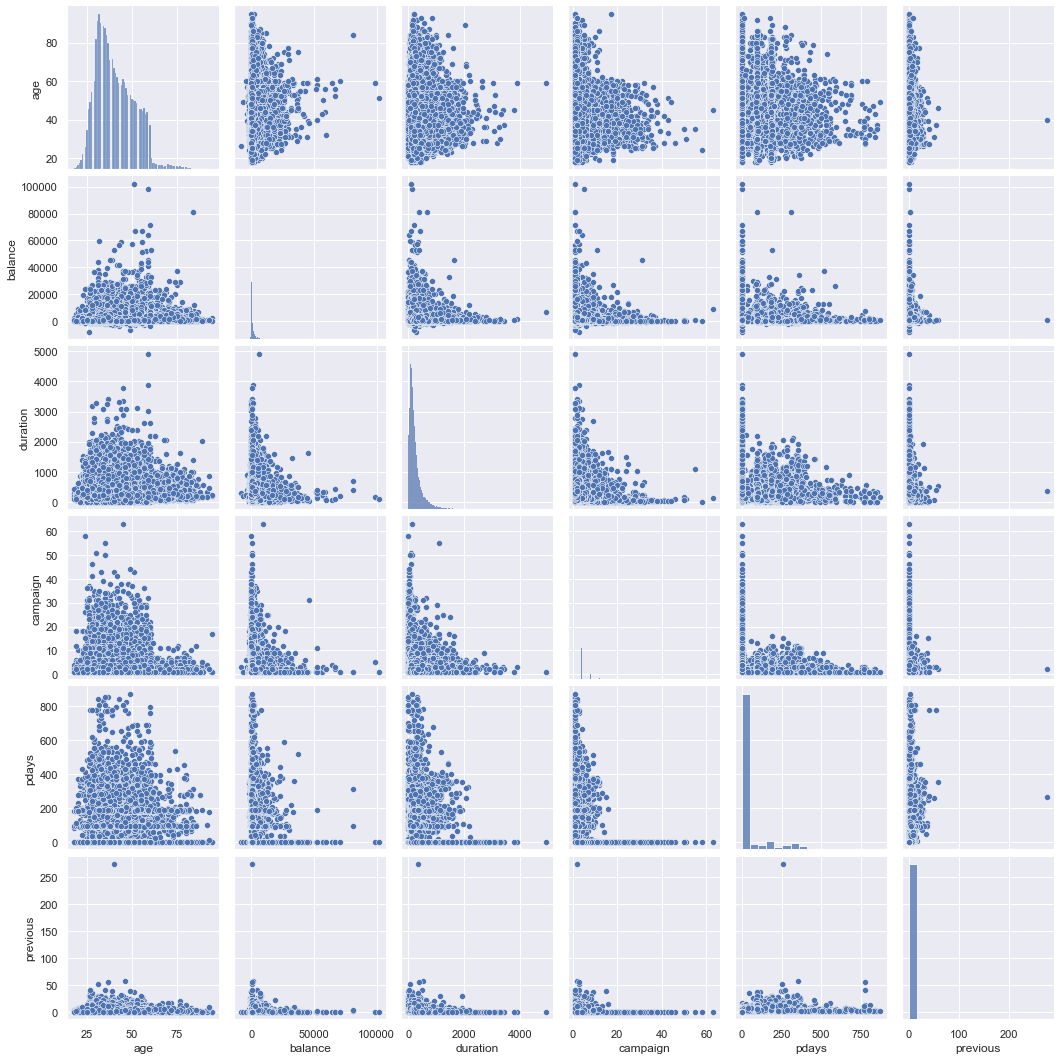

In [45]:
#Regression plot
sns.pairplot(df)

In [46]:
#df['y']=df['y'].str.replace('no','0')
#df['y']=df['y'].str.replace('yes','1')
df['y']= df['y'].map({'yes': 1, 'no': 0})
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

###  Divide our data into dependent and indepedent variables

In [47]:
X= df.drop(["y"], axis=1)
Y= df["y"]

In [48]:
X.head(2)

,age,default,balance,housing,loan,duration,campaign,pdays,previous
0,58,no,2143,yes,no,261,1,-1,0
1,44,no,29,yes,no,151,1,-1,0


In [49]:
Y.head(2)

0    0
1    0
Name: y, dtype: int64

In [50]:
#Apply get_dummies
X= pd.get_dummies(X,drop_first = True)

In [51]:
X.head(2)

,age,balance,duration,campaign,pdays,previous,default_yes,housing_yes,loan_yes
0,58,2143,261,1,-1,0,0,1,0
1,44,29,151,1,-1,0,0,1,0


In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\91830\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Predict for X dataset
y_pred = classifier.predict(X)
y_pred_prob= classifier.predict_proba(X)
y_pred_prob 

array([[0.97338094, 0.02661906],
       [0.97323296, 0.02676704],
       [0.98185678, 0.01814322],
       ...,
       [0.29801372, 0.70198628],
       [0.83302012, 0.16697988],
       [0.40123008, 0.59876992]])

In [54]:
y_pred_df = pd.DataFrame({'actual':Y, 'predicted': y_pred,'prob[0]':y_pred_prob[:,0],'prob[1]':y_pred_prob[:,1]})
y_pred_df #Based on higher probability it will show 0 or 1. here threshould value is 0.5

,actual,predicted,prob[0],prob[1]
0,0,0,0.973381,0.026619
1,0,0,0.973233,0.026767
2,0,0,0.981857,0.018143
3,0,0,0.979707,0.020293
4,0,0,0.797862,0.202138
...,...,...,...,...
45206,1,1,0.372735,0.627265
45207,1,0,0.861218,0.138782
45208,1,1,0.298014,0.701986
45209,0,0,0.833020,0.166980


In [55]:
pd.crosstab(y_pred_df.actual,y_pred_df.predicted)

predicted,0,1
actual,,
0,39092,830
1,4192,1097


In [56]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.21      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.87     45211



In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
df_new = pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new

,fpr,tpr,cutoff
0,0.000000,0.000000,2.000000e+00
1,0.000025,0.000000,1.000000e+00
2,0.000075,0.000000,9.999895e-01
3,0.000075,0.000189,9.999826e-01
4,0.000150,0.000189,9.999327e-01
...,...,...,...
7389,0.990782,0.999622,1.434947e-03
7390,0.990782,0.999811,1.420422e-03
7391,0.996669,0.999811,2.664155e-04
7392,0.996669,1.000000,2.660876e-04


Text(0, 0.5, 'True Positive Rate')

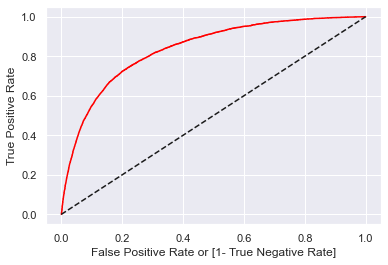

In [58]:
#Draw ROC-curve
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color ='red', label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')

In [59]:
auc

0.5933105337218884

In [60]:
df_new[df_new["tpr"]>0.68]
df_new[df_new["fpr"]>0.2]

,fpr,tpr,cutoff
4641,0.200516,0.723388,1.427268e-01
4642,0.200516,0.723577,1.427167e-01
4643,0.200741,0.723577,1.426043e-01
4644,0.200741,0.723766,1.425992e-01
4645,0.200792,0.723766,1.425786e-01
...,...,...,...
7389,0.990782,0.999622,1.434947e-03
7390,0.990782,0.999811,1.420422e-03
7391,0.996669,0.999811,2.664155e-04
7392,0.996669,1.000000,2.660876e-04


In [61]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({"actual":Y,"Pred":0})
new_pred
new_pred.loc[prob>0.68,"pred"]=1
new_pred

,actual,Pred,pred
0,0,0,NaN
1,0,0,NaN
2,0,0,NaN
3,0,0,NaN
4,0,0,NaN
...,...,...,...
45206,1,0,NaN
45207,1,0,NaN
45208,1,0,1.0
45209,0,0,NaN


In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.21      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.87     45211



## Splitting data into training and testing data set

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [64]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((36168, 9), (9043, 9), (36168,), (9043,))

In [65]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

In [66]:
m1.fit(X_train, Y_train)

C:\Users\91830\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
m1.score(X_test,Y_test)

0.891850049762247

In [68]:
m1.score(X_train,Y_train)

0.8876078301260784

### Solve by Ridge and  Lasso regression
#### # import Lasso regression from sklearn library 


In [79]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, Y_train) 
y_pred = ridgeR.predict(X_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2)
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


0.08146111147979866
       Columns  Coefficient Estimate
0          age             -0.000077
1      balance              0.000003
2     duration              0.000487
3     campaign             -0.003033
4        pdays              0.000316
5     previous              0.006152
6  default_yes             -0.019245
7  housing_yes             -0.098472
8     loan_yes             -0.043015


In [80]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, Y_train) 
y_pred1 = lasso.predict(X_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - Y_test)**2)
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 0.08501722602553008
       Columns  Coefficient Estimate
0          age              0.000000
1      balance              0.000004
2     duration              0.000474
3     campaign             -0.000000
4        pdays              0.000232
5     previous              0.000000
6  default_yes             -0.000000
7  housing_yes             -0.000000
8     loan_yes             -0.000000
